# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data-Loading + Wrangling

In [10]:
data = pd.read_csv(r'C:\Users\po1aa\Desktop\Association.csv')
data = data.groupby('Name').apply(lambda x: list(x.Vendor))
data.head()

Name
#FE2552                                         [Cluc, Cluc]
#FE2553                               [Kilim Art, Kilim Art]
#FE2554                                           [Taj, Taj]
#FE2555    [Giftrest, Giftrest, Giftrest, Giftrest, Giftr...
#FE2556                                              [Awtad]
dtype: object

In [11]:
data = data.tolist()
data

[['Cluc', 'Cluc'],
 ['Kilim Art', 'Kilim Art'],
 ['Taj', 'Taj'],
 ['Giftrest',
  'Giftrest',
  'Giftrest',
  'Giftrest',
  'Giftrest',
  'Giftrest',
  'Giftrest'],
 ['Awtad'],
 ['Taj'],
 ["Nature's"],
 ['Nile Flowers', 'Nile Flowers'],
 ['Lazy Bag'],
 ['Inside Out'],
 ['Tree House', 'Tree House'],
 ['Taj', 'Taj'],
 ['Candle Connection', 'Kauket', 'Kauket', 'Kauket'],
 ['Tree House', 'Tree House', 'Tree House', 'Tree House'],
 ['Nile Flowers',
  'Nile Flowers',
  'Nile Flowers',
  'Nile Flowers',
  'Nile Flowers'],
 ['Tree House',
  'Tree House',
  'Tree House',
  'Tree House',
  'Tree House',
  'Tree House'],
 ['ZOYA'],
 ['Abboud Designs'],
 ['Tree House', 'Tree House'],
 ['Kilim Art'],
 ['Taj'],
 ['Tree House', 'Tree House'],
 ['Nile Flowers', 'Lazy Bag', 'Candle Connection', 'Candle Connection'],
 ['Tree House', 'Tree House'],
 ['Taj', 'Taj'],
 ['Taj'],
 ['Nile Flowers'],
 ['Cluc'],
 ['Lazy Bag'],
 ['The Knot', 'The Knot', 'The Knot'],
 ['Tree House'],
 ['Azha'],
 ['Azha'],
 ['Azha',

In [26]:
# Removing Duplicates
data = [sorted(set(a), key=a.index) for a in data]
dataframe = pd.DataFrame.from_records(data)
dataframe 

,0,1,2,3,4,5,6,7
0,Cluc,None,None,None,None,None,None,None
1,Kilim Art,None,None,None,None,None,None,None
2,Taj,None,None,None,None,None,None,None
3,Giftrest,None,None,None,None,None,None,None
4,Awtad,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
1360,Candle Connection,Baggy Bag,Five Fives,Areej,None,None,None,None
1361,Candle Connection,None,None,None,None,None,None,None
1362,Candle Connection,None,None,None,None,None,None,None
1363,Taj,Candle Connection,Pino Crafts,ZOYA,NaN,None,None,None


In [14]:
#Removing None/nan cells & storing clean records in a list of lists 
records = []
for i in range (0, 1365):
    records.append([str(dataframe.values[i,j]) for j in range(0, 7)])
#Removing nan strings
nan = 'nan'
none = 'None'
cleanRecords = [[ele for ele in sub if ele != none] for sub in records]
cleanRecords = [[ele for ele in sub if ele != nan] for sub in cleanRecords]
cleanRecords

[['Cluc'],
 ['Kilim Art'],
 ['Taj'],
 ['Giftrest'],
 ['Awtad'],
 ['Taj'],
 ["Nature's"],
 ['Nile Flowers'],
 ['Lazy Bag'],
 ['Inside Out'],
 ['Tree House'],
 ['Taj'],
 ['Candle Connection', 'Kauket'],
 ['Tree House'],
 ['Nile Flowers'],
 ['Tree House'],
 ['ZOYA'],
 ['Abboud Designs'],
 ['Tree House'],
 ['Kilim Art'],
 ['Taj'],
 ['Tree House'],
 ['Nile Flowers', 'Lazy Bag', 'Candle Connection'],
 ['Tree House'],
 ['Taj'],
 ['Taj'],
 ['Nile Flowers'],
 ['Cluc'],
 ['Lazy Bag'],
 ['The Knot'],
 ['Tree House'],
 ['Azha'],
 ['Azha'],
 ['Azha'],
 ['Azha'],
 ['Azha'],
 ['Akela'],
 ['Akela'],
 ['Azha'],
 ['Azha'],
 ['Azha'],
 ['Azha', 'S & R'],
 ['Azha'],
 ['Azha'],
 ['Nile Flowers'],
 ['Azha'],
 ['Nile Flowers'],
 ['Nile Flowers'],
 ['Nile Flowers'],
 ['Nile Flowers'],
 ['Nile Flowers'],
 ['Nile Flowers', 'Azha'],
 ['Azha'],
 ['S & R'],
 ['Azha'],
 ['S & R'],
 ['S & R'],
 ['S & R'],
 ['Nile Flowers', 'S & R'],
 ['S & R'],
 ['S & R', 'Only One'],
 ['Inside Out'],
 ['Yashmk'],
 ['Azha', 'Inside 

In [18]:
#Turning transactions into a dummy 
te = TransactionEncoder()
te_ary = te.fit(cleanRecords).transform(cleanRecords)
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

,404 Gallery,Abboud Designs,Akela,Alinestores,Areej,Ariika,Awtad,Azha,Baggy Bag,Bijar,...,The shoe,Tica's,Timos,Tree House,Trio Egypt,Yashmk,ZOYA,khan Masrour,lomlom,party to remember
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


OrderedDict([('Azha', 411),
             ('Nile Flowers', 151),
             ('Candle Connection', 148),
             ('The shoe', 130),
             ('Futa Egypt', 80),
             ('Taj', 61),
             ('party to remember', 52),
             ('khan Masrour', 37),
             ('ZOYA', 36),
             ('Lotfy', 32)])

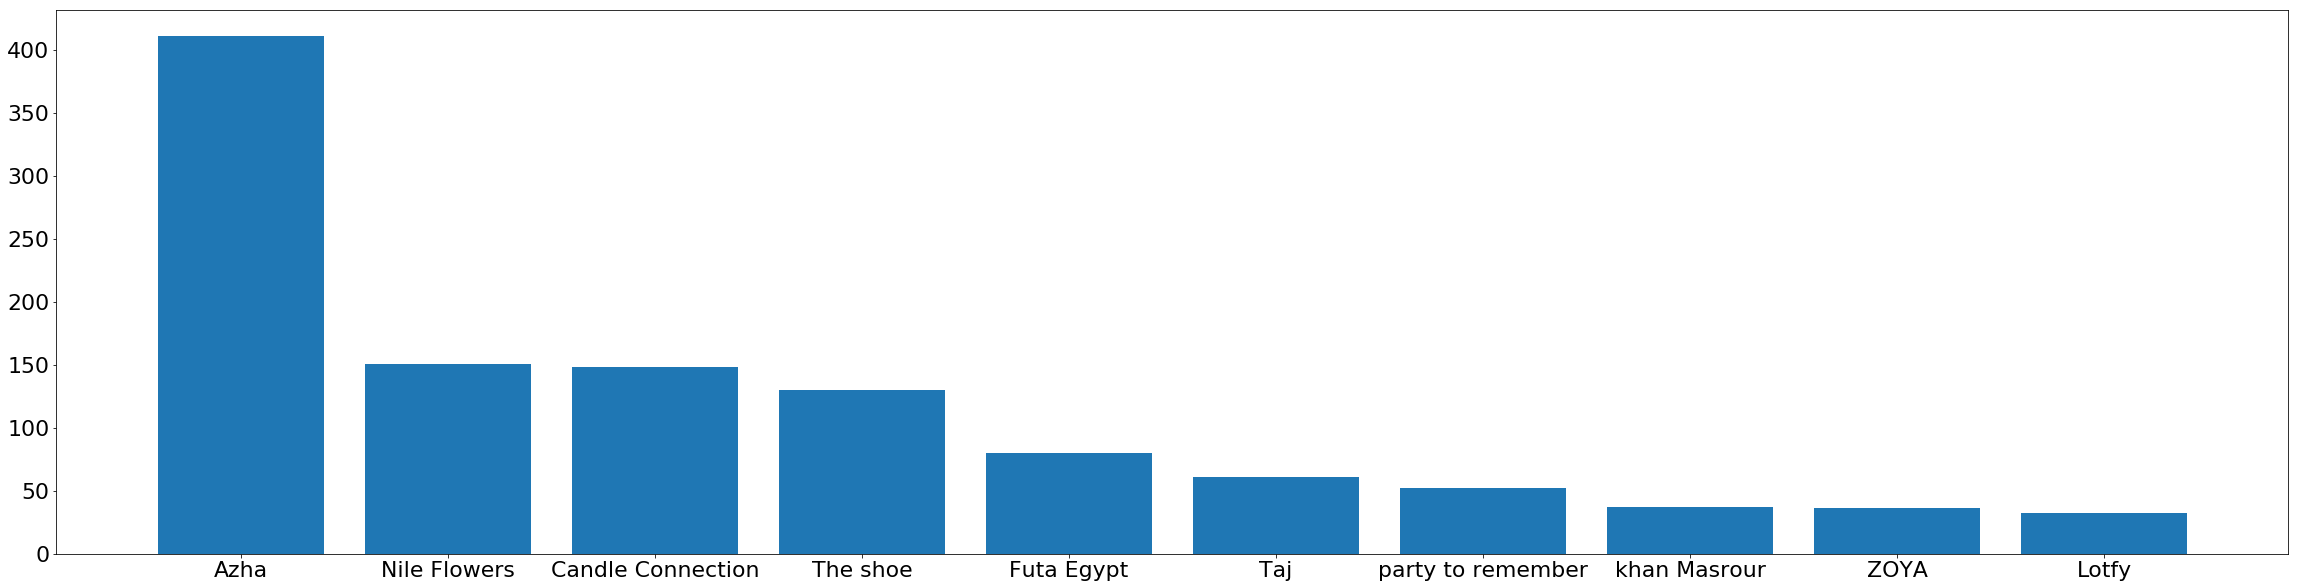

In [23]:
#Visualizing best sellers from the CleanRecords
from itertools import chain
from collections import Counter, OrderedDict
pivot = Counter(chain.from_iterable(cleanRecords))
pivot = OrderedDict(pivot.most_common(10))
#lisst = pivot.most_common(10)
pivotdf = pd.DataFrame.from_dict(pivot, orient='index').reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
plt.rc('font', size= 22)
plt.bar(pivot.keys(), pivot.values())
pivot

# Mining frequent item sets

In [7]:
frequent_itemsets = apriori(transactions, min_support = 0.0002, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.001465,(404 Gallery),1
1,0.013919,(Abboud Designs),1
2,0.003663,(Akela),1
3,0.010256,(Alinestores),1
4,0.006593,(Areej),1
...,...,...,...
787,0.001465,"(Giftrest, Timos, Nile Flowers, Only One, Exot...",6
788,0.000733,"(Ariika, Candle Connection, Makan Bohiemy, Nma...",7
789,0.000733,"(Candle Connection, Nile Flowers, Exotic, Trio...",7
790,0.000733,"(Candle Connection, Giftrest, Timos, Nile Flow...",7


In [24]:
FI = frequent_itemsets[ (frequent_itemsets['length'] >= 2)]
FI

,support,itemsets,length
75,0.000733,"(Only One, 404 Gallery)",2
76,0.000733,"(Abboud Designs, Azha)",2
77,0.000733,"(Candle Connection, Abboud Designs)",2
78,0.000733,"(Inside Out, Abboud Designs)",2
79,0.000733,"(Taj, Abboud Designs)",2
...,...,...,...
787,0.001465,"(Giftrest, Timos, Nile Flowers, Only One, Exot...",6
788,0.000733,"(Ariika, Candle Connection, Makan Bohiemy, Nma...",7
789,0.000733,"(Candle Connection, Nile Flowers, Exotic, Trio...",7
790,0.000733,"(Candle Connection, Giftrest, Timos, Nile Flow...",7


In [25]:
fullinfo=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.005)
fullinfo[fullinfo['antecedents'].astype(str).str.contains("Azha")]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
81,(Azha),(Candle Connection),0.301099,0.108425,0.002930,0.009732,0.089761,-0.029716,0.900338
86,(Azha),(Honey accessories),0.301099,0.014652,0.002930,0.009732,0.664234,-0.001481,0.995032
90,(Azha),(Inside Out),0.301099,0.009524,0.002930,0.009732,1.021898,0.000063,1.000211
102,(Azha),(Taj),0.301099,0.044689,0.003663,0.012165,0.272227,-0.009793,0.967076
108,(Azha),(khan Masrour),0.301099,0.027106,0.003663,0.012165,0.448806,-0.004499,0.984875
110,(Azha),(party to remember),0.301099,0.038095,0.003663,0.012165,0.319343,-0.007807,0.973751
476,"(Inside Out, Azha)",(Abboud Designs),0.002930,0.013919,0.000733,0.250000,17.960526,0.000692,1.314774
477,"(Abboud Designs, Azha)",(Inside Out),0.000733,0.009524,0.000733,1.000000,105.000000,0.000726,inf
493,"(Candle Connection, Azha)",(Areej),0.002930,0.006593,0.000733,0.250000,37.916667,0.000713,1.324542
494,"(Areej, Azha)",(Candle Connection),0.000733,0.108425,0.000733,1.000000,9.222973,0.000653,inf
